Questions to answer:
1. What are the salient features of the listings in top neighbourhoods? (property type, price, minimum nights stay) 
2. What factors are responsible for the booking of a listing?
3. How does the average price across top 10 neighbourhoods vary across months?

In [1]:
import os
os.getcwd()

'D:\\Onedrive\\Personal\\Udacity\\Data Scientist\\Project 1'

In [36]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 15]

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\suhas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [4]:
# Import data
calendar = pd.read_csv("./Data/calendar.csv")
listings = pd.read_csv("./Data/listings.csv")
reviews = pd.read_csv("./Data/reviews.csv")

In [5]:
calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [6]:
calendar = pd.read_csv("./Data/calendar.csv")
dates = []
month_name = []
for index, rows in calendar.iterrows():
    date_temp = datetime.datetime.strptime(rows['date'], "%Y-%m-%d")
    month_temp = date_temp.strftime('%B')
    dates.append(date_temp)
    month_name.append(month_temp)

In [7]:
calendar['date'] = dates

In [8]:
calendar['Month_Name'] = month_name

In [9]:
calendar

,listing_id,date,available,price,Month_Name
0,241032,2016-01-04,t,$85.00,January
1,241032,2016-01-05,t,$85.00,January
2,241032,2016-01-06,f,NaN,January
3,241032,2016-01-07,f,NaN,January
4,241032,2016-01-08,f,NaN,January
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,December
1393566,10208623,2016-12-30,f,NaN,December
1393567,10208623,2016-12-31,f,NaN,December
1393568,10208623,2017-01-01,f,NaN,January


In [10]:
listings[listings['id']==241032]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a small landscape business. My life revolves around beauty wherever I find it or create it. I grew up in Seattle and love this city for the people, it's natural beauty and don't know anywhere 

In [11]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,"The description and pictures of the apartment were exactly what we received. Moreover, the place was very nice and we really enjoyed our stay! The location was perfect for being near to the conference center. In addition, we stayed during a weird stretch of weather (sometimes hot, sometimes cold), and they were very accommodating by providing both extra heating and cooling units. Check-in was smooth and thorough. We appreciated receiving 6 sets of keys, since we had 4 adults staying in the same place. Also, we forgot to return one of the parking fobs when we checked out, and they let us return it late without an issue. All together, a very enjoyable experience and we would stay here again!"
84845,3624990,51024875,2015-10-17,6933252,Linda,"We had an excellent stay. It was clean and comfortable, and very convenient to the convention center and downtown. The beds were comfy, the apartment was quiet, I would stay there again any time."
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del centro de Seattle. El departamento está súper equipado para que tengas todo lo necesario. Doug fue muy amable y servicial, disfrutamos mucho la estancia."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Situated next to the convension center, take the back entrance and you will be there in no time. In walking distance to most everything downtown, and close to good places like the six arms just 100yrds up the street. on the negative side can two of the rooms be some what noisy due laundry in the building."


In [12]:
(calendar.isnull().sum()/calendar.shape[0]).sort_values(ascending=False)

price         0.32939
Month_Name    0.00000
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [13]:
(listings.isnull().sum()/listings.shape[0]).sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [14]:
listings[listings['review_scores_rating'].isnull()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,"A charming apartment that sits atop Queen Anne hill, northwest facing bay windows with warm afternoon light setting over the Olympic Cascades. The space is perfect for one or two but can accommodate up to three on the fold-out memory foam cot.",NaN,"A charming apartment that sits atop Queen Anne hill, northwest facing bay windows with warm afternoon light setting over the Olympic Cascades. The space is perfect for one or two but can accommodate up to three on the fold-out memory foam cot.",none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6302c803_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,NaN,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,"https://a2.muscache.com/ac/users/9851441/profile_pic/1414045273/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70","https://a2.muscache.com/ac/users/9851441/profile_pic/1414045273/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=225:*&output-format=jpg&output-quality=70",Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jumio']",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",NaN,$100.00,$650.00,"$2,300.00",NaN,NaN,1,$0.00,1,1125,6 months ago,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
18,7735464,https://www.airbnb.com/rooms/7735464,20160104002432,2016-01-04,Queen Anne Getaway Near Seattle!,"The second room in our spacious 2BR / 2 Bath apartment functions as both our office and a second bedroom for family, guests, and visitors! All the comforts of home, minutes from downtown Seattle, yet you feel like you're in the suburbs!",NaN,"The second room in our spacious 2BR / 2 Bath apartment functions as both our office and a second bedroom for family, guests, and visitors! All the comforts of home, minutes from downtown Seattle, yet you feel like you're in the suburbs!",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/98338372/c8a06130_original.jpg?interpolation=la

In [15]:
(reviews.isnull().sum()/reviews.shape[0]).sort_values(ascending=False)

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In [17]:
neighbourhoods = listings['neighbourhood'].value_counts().reset_index().sort_values('neighbourhood',ascending=False)
neighbourhoods.rename(columns={'index': 'Neighbourhood', 'neighbourhood': 'count'}, inplace=True)
neighbourhoods

,Neighbourhood,count
0,Capitol Hill,351
1,Ballard,213
2,Belltown,204
3,Minor,192
4,Queen Anne,187
5,Fremont,148
6,Wallingford,143
7,University District,107
8,First Hill,105
9,Stevens,98


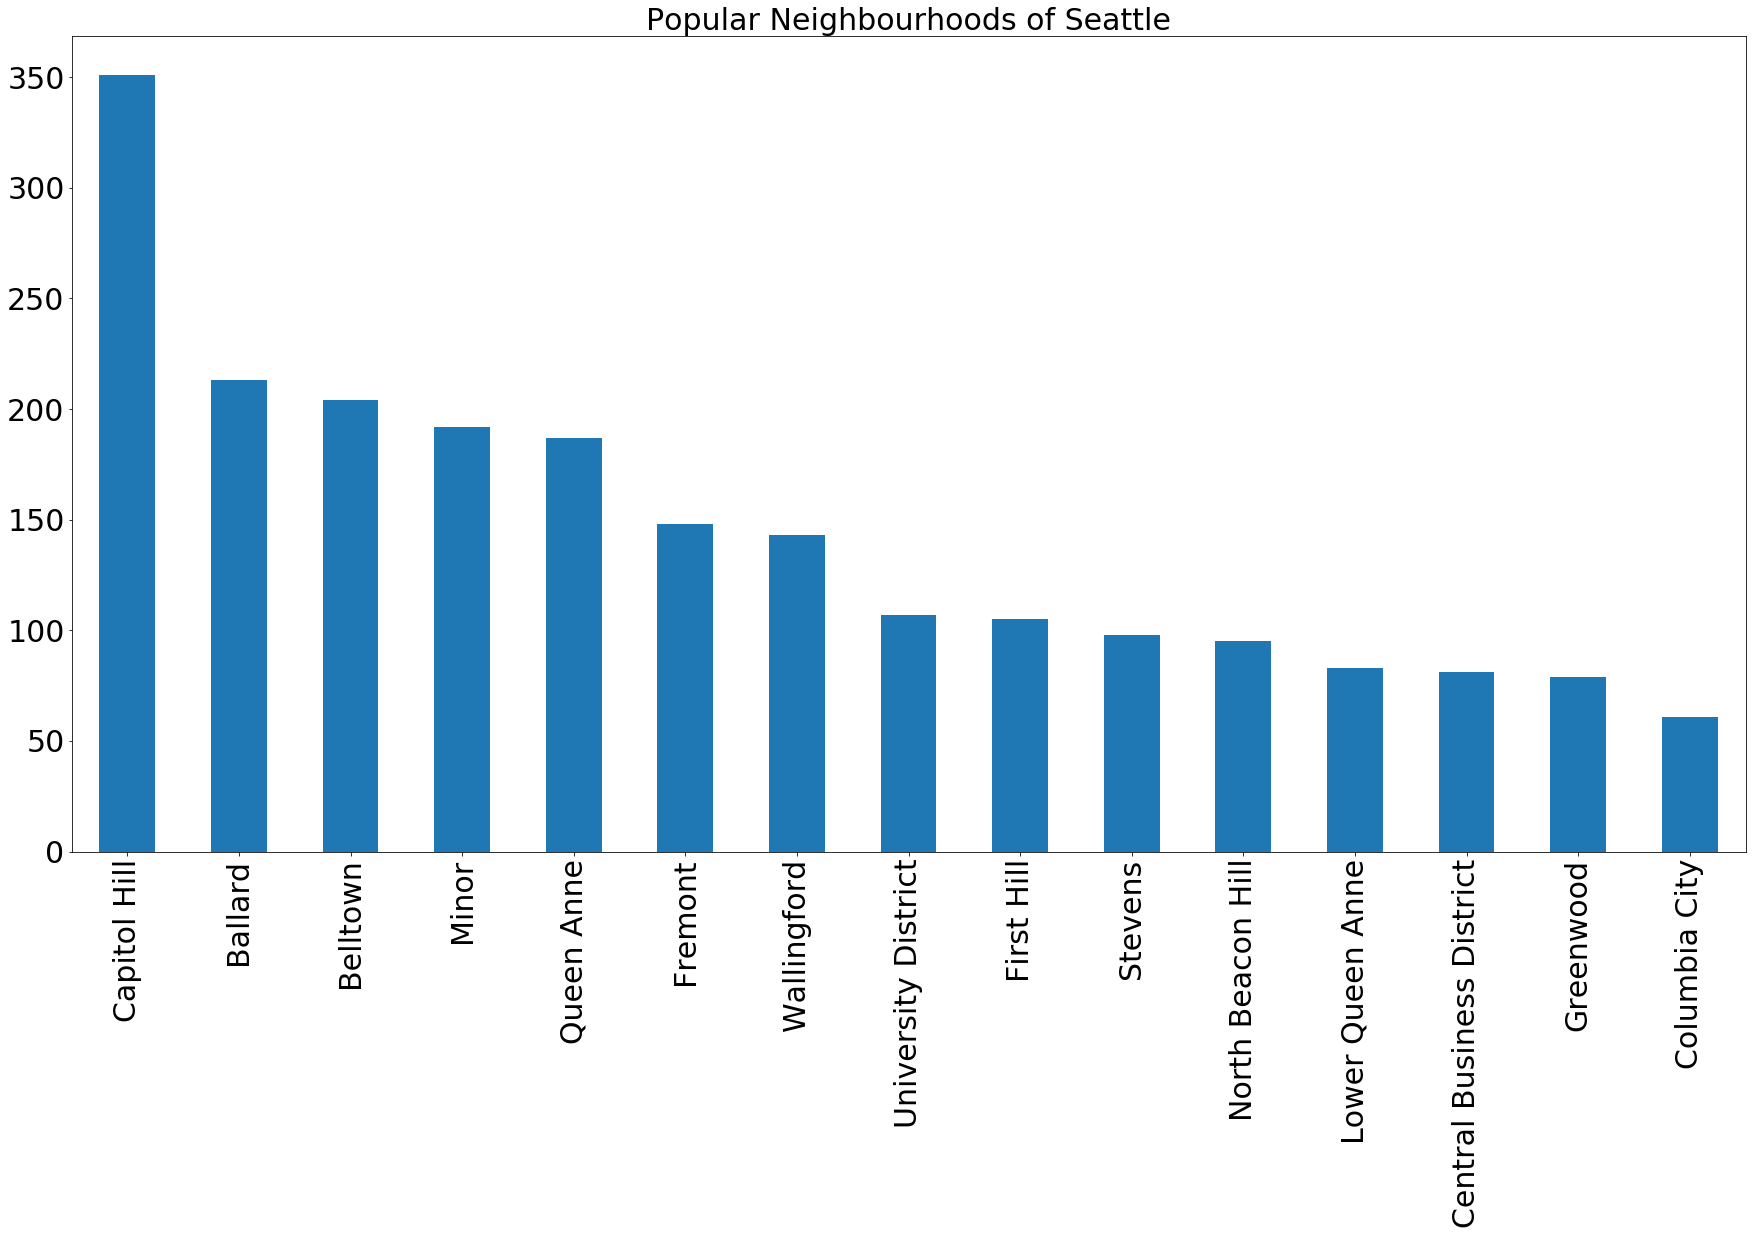

In [41]:
top_neighbourhoods = neighbourhoods.head(15)
top_neighbourhoods.plot(kind='bar', legend=None).set_xticklabels(top_neighbourhoods['Neighbourhood']);
plt.title('Popular Neighbourhoods of Seattle',fontsize=30);
plt.xticks(fontsize=30);
plt.yticks(fontsize=30);
plt.show()